# Machine Learning Bootcamp - Actuarial Society Finland

<img src="AMLProblem.png" alt="Drawing" style="width: 600px;"/>
 
As discussed in Chapter 2 of the [course book](https://arxiv.org/abs/1805.05052), many machine learning (ML) problems and methods consist of three components: 

1. data points as the basic unit of information; data points are characterized by features (can be measured easily) and labels (high-level information that is difficult to acquire). 
2. a hypothesis space (also referred to as a ML model) consisting of computationally feasible predictor functions. 
3. a loss function that is used to assess the quality of a particular predictor function. 

To implement ML methods, we need to be able to efficiently **store and manipulate** data and predictor functions.  A quite powerful tool to represent and manipulate data and predictor functions are [matrices and vectors](https://en.wikipedia.org/wiki/Matrix_(mathematics)). 

Indeed, data points can often characterized by a list of numeric attributes, or "features", $x_{r}$ which can be stacked conveniently into a vector $\mathbf{x}=\big(x_{1},\ldots,x_{n}\big)^{T}$. Moreover, many ML methods (such as linear regression or logistic regression) use predictor functions of the form $h(\mathbf{x}) = \mathbf{w}^{T} \mathbf{x}$ with some weight vector $\mathbf{w}$. Note that once we restrict ourselves to linear functions of the form $h(\mathbf{x}) = \mathbf{w}^{T} \mathbf{x}$, we can represent a predictor function by the weight vector $\mathbf{w}$. Indeed, given the weight vector $\mathbf{w}$, we can evaluate the predictor function for any feature vector $\mathbf{x}$ as $h(\mathbf{x}) = \mathbf{w}^{T} \mathbf{x}$. 

## Learning goals

In this "warm-up" exercise you will learn how to 

* manipulate matrices and vectors,
* use Python dictionaries for accessing datasets,
* determine the execution time (which is a measure of computational complexity) of code blocks, 
* read in data from various sources such as files or the internet,
* visualize data using scatter plots,
* fit simple functions to data. 

This notebook contains several student tasks which require you to write a few lines of Python code to solve small problems. In particular, you have to fill in the gaps marked as **Student Task**.



## Relevant Parts of [Course Book](https://arxiv.org/abs/1805.05052)  

Chapter 1; Chapter 2


<a id="Q3"></a>

## Let's Grab Data!

One of the key components of any machine learning problem (and method) is data. There are many different sources of data such as files stored on a hard-disk or internet databases such as [Wikidata](https://www.wikidata.org/wiki/Wikidata:Main_Page). Another source of data is provided in ready-made Python functions which load specific toy datasets https://scikit-learn.org/stable/datasets/index.html. 

<a id='LoadDataset'></a>
<div class=" alert alert-info">
    <b>Car Crash Data.</b> 

The code snippet below reads in a data set consituted by reports of car crashes. This data set consists of all drivers involved in a crash in 2004 in New South Wales, Australia. There are  a total of 82659 drivers in the data set. Drivers with unknown age, age less than 17 years, or road user class ``Other" are omitted, leaving 76341
cases.

Each case correpsons to one data point with the features: 

- "agecat" ... driver's age, coded as
		1 = 17-20
		2 = 21-25
		3 = 26-29
		10 = 30-39 (4 coded as 10 to be base level) 
		5 = 40-49
		6 = 50-59
		7 = 60+
- "roaduserclass"... 	10 = car (coded to be base level)
		2 = light truck
		4 = bus / heavy rigid truck / articulated truck
		6 = motorcycle
- "sex"		driver's sex: M, F
- "degree"		degree of crash, coded as 1 = non-casualty, 2 = injury, 3 = fatal
- "number"		frequency of crashes

In [47]:
import pandas as pd             # use shorthand "pd" for lib "pandas" which provides methods for 
from sklearn.preprocessing import OneHotEncoder
import requests
import matplotlib.pyplot as plt
import numpy as np



enc = OneHotEncoder(handle_unknown='ignore')

df = pd.read_csv("https://raw.githubusercontent.com/alexjungaalto/ResearchPublic/master/injury.csv",sep=";")
#df = pd.read_csv("injury.csv",sep=";")
print(df.head(5))
#print(df.columns[2])

X = df.values # convert the data frame to numpy array
agecat=X[:,0].reshape(-1,1)
user=X[:,1].reshape(-1,1)
sex=X[:,2].reshape(-1,1)
degree=X[:,3].reshape(-1,1)
numbers = X[:,4]
print("\n total number of cases : ",np.sum(numbers),"\n")
enc.fit(agecat)
agecat_new= enc.transform(agecat).toarray()
enc.fit(user)
user_new = enc.transform(user).toarray()
enc.fit(sex)
sex_new = enc.transform(sex).toarray()
enc.fit(degree)
degree_new = enc.transform(degree).toarray()

print("one hot encoded age group of first four cases : \n")
print(agecat_new[0:4])
print("\n shape of one hot encoding of age group: ", agecat_new.shape, "\n")

print(X[7,2])



m = X.shape[0]
n = X.shape[1]
#print('sample size m=', m)
#print('feature length n=', n)

#df1 = pd.get_dummies(df) # convert the data frame to numpy array

#print(df1.head(5))
print("shape of degree ", degree_new.shape)
print("shape of numbers ", numbers.shape)
print(type(degree))


#plot histogram of different degrees

#nr_degrees = np.unique(degree).shape[0]
#print(nr_degrees)
#plt.hist(degree, bins = nr_degrees)
#plt.show()
#idx=np.where(degree == 1)[0]

#print(agecat[idx])

   agecat  roaduserclass sex  degree  number
0       1             10   M       3      53
1       2             10   M       3      37
2       3             10   M       3      19
3      10             10   M       3      44
4       5             10   M       3      34

 total number of cases :  76341 

one hot encoded age group of first four cases : 

[[1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]

 shape of one hot encoding of age group:  (209, 7) 

M
shape of degree  (209, 3)
shape of numbers  (209,)
<class 'numpy.ndarray'>


The code snippet below generates a scatter plot using different features. 

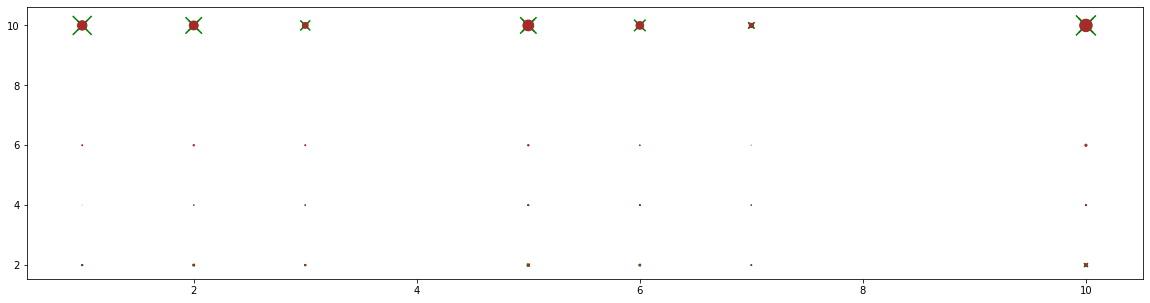

In [48]:
indx_1 = np.where(degree == 1)[0] # indices of degree 1 accidents 
indx_2 = np.where(degree == 2)[0] # indices of degree 2 accidents 
plt.rc('legend', fontsize=20) 

num = numbers.astype(float)
marker_size=(20*num/(np.amax(num)))**2

size1=marker_size[indx_1]
size2=marker_size[indx_2]
                       
plt.scatter(agecat[indx_1], user[indx_1], c='g', s=size1,marker ='x', label='y =1; Class 0 wine')
plt.scatter(agecat[indx_2], user[indx_2], c='brown', s=size2, marker ='o', label='y =1; Class 0 wine')

The code snippet below reads in the features $\mathbf{x}^{(i)}$ for each accident case $i=1,\ldots,m$ into the matrix $\mathbf{X}=\big(\mathbf{x}^{(1)},\ldots,\mathbf{x}^{(n)}\big)^{T} \in \mathbb{R}^{m \times n}$. The accident degree is used as label $y^{(i)}$ and stacked into the vector $\mathbf{y} = \big(y^{(1)},\ldots,y^{(m)} \big)^{T}$. 

In [49]:
import random
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression


indx_1 = np.where(degree == 1)[0] # indices of degree 1 accidents 
indx_2 = np.where(degree == 2)[0] # indices of degree 2 accidents 
m_acc_2 = indx_2.shape[0]
indx_3 = np.where(degree ==3)[0]  #indices of degree 3 accidents
m_acc_3 = indx_3.shape[0]
n_extra = 2   # number of additional features coming e.g. from case reports
case_reports = np.random.randn(m,n_extra)
case_reports[indx_2,:] = 5+3*np.random.randn(m_acc_2,n_extra) 
case_reports[indx_3,:] = -5+3*np.random.randn(m_acc_3,n_extra) 
snapshots =  np.random.randn(m,100)

X = np.concatenate((sex_new, agecat_new,user_new,case_reports,snapshots), axis=1)
y = degree; 
y=y.astype('int')
#plt.scatter(case_reports[:,0],case_reports[:,1], c='g')
print("number of original features :",sex_new.shape[1]+agecat_new.shape[1]+user_new.shape[1])

number of original features : 13


The code snippet below learns a classifier via logistic regression. 

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf1 = ExtraTreesClassifier(n_estimators=50)
clf1 = clf1.fit(X, y)
print(clf1.feature_importances_)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

clf = LogisticRegression(random_state=0,penalty='none',solver='lbfgs',multi_class='multinomial') 
clf.fit(X_train, y_train)
#print(clf.coef_)
print("training error = ",1-clf.score(X_train,y_train))
print("validation error = ",1-clf.score(X_test, y_test)) 





[0.00413404 0.00596272 0.00306372 0.00351003 0.0035509  0.00330771
 0.00431253 0.00382931 0.0036825  0.00435666 0.00453378 0.00402634
 0.00587712 0.13621372 0.11945804 0.00790733 0.00694499 0.00869664
 0.00699314 0.01049767 0.00634058 0.00841307 0.00871352 0.00549978
 0.00865658 0.00698767 0.00689511 0.00915171 0.00605559 0.01374565
 0.00684338 0.00493152 0.00522873 0.00854396 0.00648662 0.01030931
 0.00404323 0.00862077 0.00566111 0.00758037 0.00744989 0.00675609
 0.00454648 0.00649842 0.00833419 0.00718029 0.00767402 0.00609478
 0.00665782 0.00721439 0.00645886 0.00589621 0.00622763 0.00472602
 0.00888939 0.00572191 0.00798443 0.00669635 0.00807442 0.00614784
 0.00640473 0.0055873  0.00704492 0.005032   0.00473554 0.00830357
 0.00497357 0.00461788 0.00611    0.00821659 0.00574229 0.00497533
 0.0079364  0.00617383 0.00343394 0.00786622 0.00622579 0.00778386
 0.00960356 0.00597691 0.00687556 0.00684274 0.00590288 0.00603186
 0.00669156 0.00423725 0.00738658 0.00857717 0.00718538 0.0062

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<a id="Q4"></a>
## Data Visualization - A Picture is Worth A Thousand Words 

We now study how to use the Python library (or package) `matplotlib` (https://matplotlib.org/index.html) to plot data.

Hint: 
- You can find useful tutorials for the `matplotlib` package under [this link](https://matplotlib.org/3.0.2/tutorials/index.html#introductory)

<function matplotlib.pyplot.show(*args, **kw)>

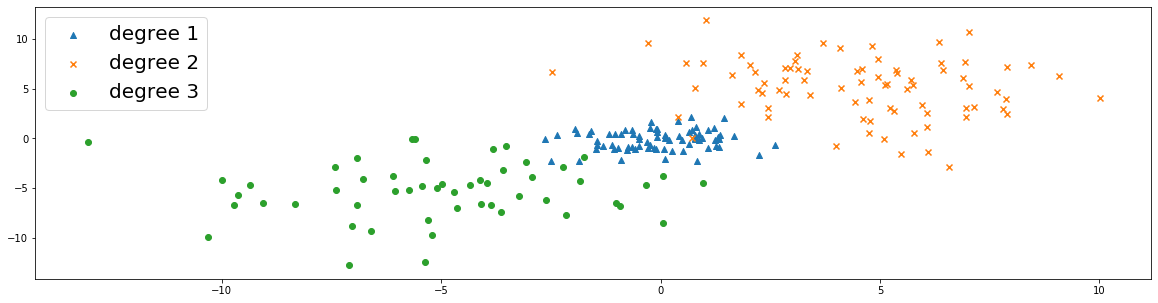

In [51]:

plt.rcParams["figure.figsize"] = (20,5)
plt.scatter(X[indx_1,13],X[indx_1,14],marker='^', label='degree 1')
plt.scatter(X[indx_2,13],X[indx_2,14],marker='x', label='degree 2')
plt.scatter(X[indx_3,13],X[indx_3,14],marker='o', label='degree 3')
#plt.scatter(data[200:400,0],data[200:400,1], c=colors[1], label='second 200 data points')
#plt.scatter(data[400:600,0],data[400:600,1], c=colors[2], label='third 200 data points')
plt.legend()
plt.show

In [52]:
X_sel = X[:,[13,14]] 

X_train, X_test, y_train, y_test = train_test_split(X_sel, y, test_size=0.4, random_state=0)

clf = LogisticRegression(random_state=0,penalty='none',solver='lbfgs',multi_class='multinomial') 
clf.fit(X_train, y_train)
#print(clf.coef_)
print("training error = ",1-clf.score(X_train,y_train))
print("validation error = ",1-clf.score(X_test, y_test)) 


training error =  0.02400000000000002
validation error =  0.023809523809523836


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
